In [1]:
import pandas as pd 
df = pd.read_csv("data_alat_lab.csv")
df2 = df.copy
df = df[['Produksi (Jumlah) Alat Lab']]
df

,Produksi (Jumlah) Alat Lab
0,21
1,19
2,11
3,11
4,27
5,8
6,15
7,19
8,10
9,13


<AxesSubplot:>

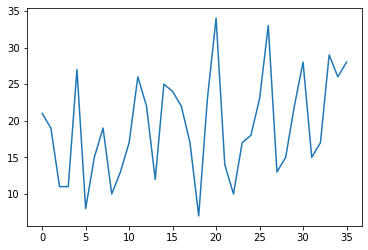

In [2]:
df['Produksi (Jumlah) Alat Lab'].plot()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Produksi (Jumlah) Alat Lab  36 non-null     int64
dtypes: int64(1)
memory usage: 416.0 bytes


<AxesSubplot:>

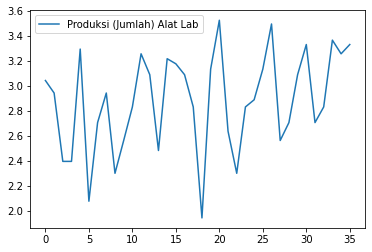

In [4]:
import numpy as np
df = np.log(df) # don't forget to transform the data back when making real predictions

df.plot()

In [5]:
msk = (df.index < len(df)/3*2)
df_train = df[msk].copy()
df_test = df[~msk].copy()
print(len(df_train))
print(len(df_test))

24
12


c:\Users\ALMUNAWWAR\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


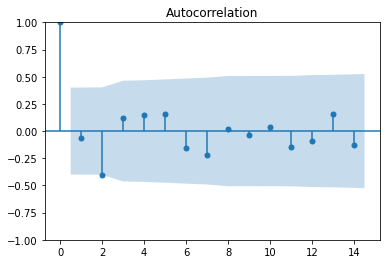

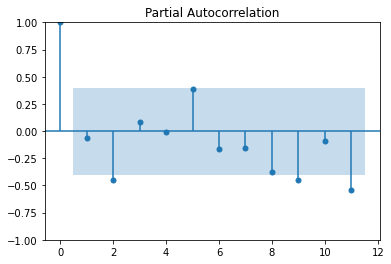

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train,lags=11)

In [7]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.6705974493394349


<AxesSubplot:>

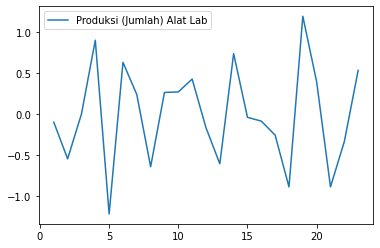

In [8]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

c:\Users\ALMUNAWWAR\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


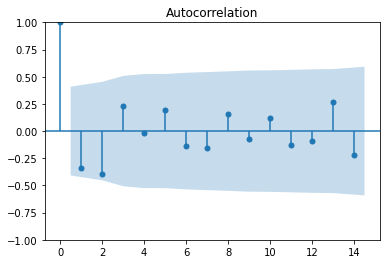

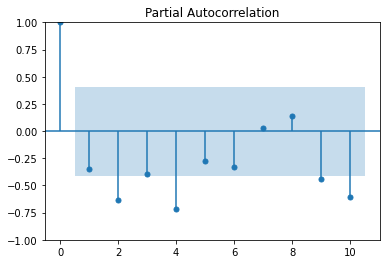

In [9]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff,lags=10)

In [10]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 9.695425527028982e-07


In [11]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                                   SARIMAX Results                                    
Dep. Variable:     Produksi (Jumlah) Alat Lab   No. Observations:                   24
Model:                         ARIMA(1, 1, 1)   Log Likelihood                 -13.939
Date:                        Sat, 18 May 2024   AIC                             33.878
Time:                                00:35:57   BIC                             37.285
Sample:                                     0   HQIC                            34.735
                                         - 24                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0225      0.253     -0.089      0.929      -0.518       0.473
ma.L1         -0.9986     10.553     -0.095      0.925     -21.683 

c:\Users\ALMUNAWWAR\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


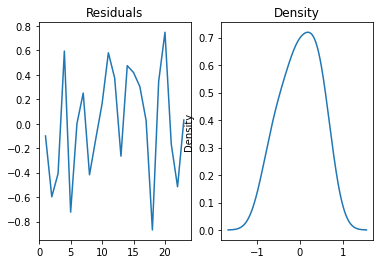

In [12]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

c:\Users\ALMUNAWWAR\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


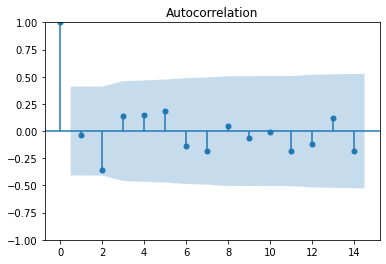

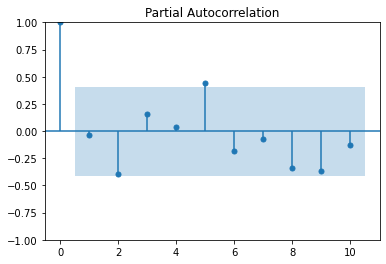

In [13]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals,lags=10)

<AxesSubplot:>

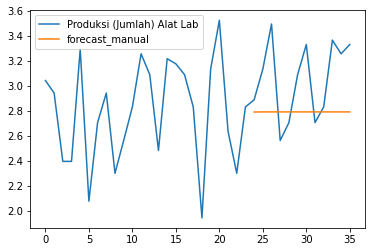

In [14]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df.plot()

In [15]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(3, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [16]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(3, 0, 1)   Log Likelihood                 -14.319
Date:                Sat, 18 May 2024   AIC                             38.638
Time:                        00:36:00   BIC                             44.528
Sample:                             0   HQIC                            40.201
                                 - 24                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8501      0.214      3.975      0.000       0.431       1.269
ar.L2         -0.3258      0.304     -1.070      0.284      -0.922       0.271
ar.L3          0.4754      0.320      1.487      0.137      -0.151       1.102
ma.L1         -0.8010      0.196     -4.077      0.000      -1.186      -0.416
sigma2         0.1491      0.063      2.365      0.018       0.026       0.273
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.73
Prob(Q):                              0.84   Prob(JB):                         0.42
Heteroskedasticity (H):               1.07   Skew:                            -0.66
Prob(H) (two-sided):                  0.93   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

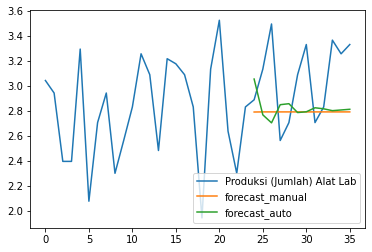

In [17]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df.plot()

In [18]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 0.3329202697727736
mape - manual: 0.10355933572469089
rmse - manual: 0.39821951663744587


In [19]:
mae = mean_absolute_error(df_test, forecast_test_auto)
mape = mean_absolute_percentage_error(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 0.35532532250300936
mape - auto: 0.11137323725815851
rmse - auto: 0.41567025142698505
